# Multilayer Perceptron to classify home appliances classes

#### Importing libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------------------------

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#---------------------------------------------------

import warnings
warnings.filterwarnings("ignore")

#### Reading the data with pandas

In [53]:
df = pd.read_csv('db.csv')

In [54]:
df.head(3)

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1


#### Data info

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 201 entries, t0 to Classes
dtypes: float64(200), int64(1)
memory usage: 157.2 KB


#### Data describe

In [56]:
df.describe()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,11.114000,7.974000,8.154000,7.334000,7.374000,6.834000,7.134000,6.874000,7.054000,6.594000,...,0.114000,-0.14600,-0.146000,0.154000,0.014000,0.374000,-0.20600,-0.146000,-0.186000,3.140000
std,10.187807,9.012776,8.899937,8.958318,8.458134,8.301816,8.230796,8.317599,8.269182,7.937996,...,2.253057,0.86292,0.829497,1.009442,1.114779,0.969548,0.78757,1.046004,0.838411,1.608186
min,-10.150000,-6.300000,-6.300000,-6.300000,-5.300000,-3.500000,-4.300000,-6.300000,-6.300000,-4.300000,...,-2.500000,-2.40000,-2.050000,-2.500000,-2.150000,-2.500000,-2.30000,-2.500000,-2.050000,1.000000
25%,0.650000,0.450000,0.700000,0.450000,0.650000,0.450000,0.600000,0.850000,0.650000,0.650000,...,-0.700000,-0.75000,-0.700000,-0.550000,-0.800000,-0.100000,-0.70000,-0.750000,-0.700000,2.000000
50%,11.925000,5.575000,4.950000,4.300000,3.600000,3.050000,3.300000,3.325000,3.225000,3.850000,...,-0.300000,-0.07500,-0.200000,0.275000,-0.075000,0.400000,-0.32500,-0.025000,-0.275000,3.000000
75%,21.250000,14.900000,17.450000,16.950000,14.900000,13.000000,14.000000,13.000000,11.950000,10.950000,...,0.300000,0.45000,0.550000,0.700000,0.700000,0.850000,0.35000,0.450000,0.250000,4.000000
max,25.850000,25.450000,26.200000,25.200000,25.200000,25.000000,24.200000,25.200000,26.200000,25.200000,...,13.550000,1.70000,1.500000,2.650000,3.500000,3.800000,1.35000,1.850000,2.500000,7.000000


#### Counting missing values

In [57]:
df.isnull().sum()

t0         0
t1         0
t2         0
t3         0
t4         0
          ..
t196       0
t197       0
t198       0
t199       0
Classes    0
Length: 201, dtype: int64

#### Counting items per classes

In [58]:
df[['Classes','t0']].groupby('Classes').count()

,t0
Classes,
1,16
2,22
3,30
4,8
5,16
6,4
7,4


#### Plotting specific item

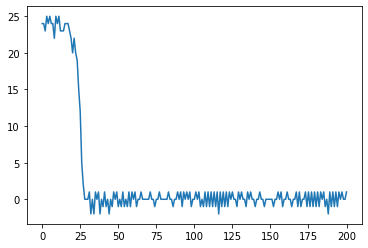

In [59]:
plt.plot(df.values[0])

#### Separating data to obtain the targets 

In [60]:
X = df.iloc[:,0:200]


In [61]:
y = df.Classes.values

#### Normalizing the data using StandardScaler

In [62]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Separating train and test data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

#### Applying MLP Classifier

In [72]:
mlp = MLPClassifier(random_state=1, max_iter=100, hidden_layer_sizes=(1000))

mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

#### Log Scores

learning_rate_init=0.001

learning_rate_init=0.01

hidden_layer_sizes=(100)

hidden_layer_sizes=(500)

#### All these changes return the same score (0.9)

In [73]:
mlp.score(X_test, y_test)

0.9

#### Applying GridSearchCV to find the best parameters, including only the solver and activation

In [15]:
grid = {'solver': ['lbfgs', 'sgd', 'adam'], 'activation': ['identity', 'logistic', 'tanh', 'relu']}
clf = GridSearchCV(MLPClassifier(random_state=1, max_iter=100, hidden_layer_sizes=(100)), grid)

clf.fit(X_train, y_train)

print("GridSearch():\n")
comb = 1
for x in grid.values():
    comb *= len(x)
print('For the application of the Grid Search there are {} combinations'.format(comb))
print("Best Parameters: ",clf.best_params_)
best_config = clf.best_params_
print("Accuracy CV:",clf.best_score_)
ppn_cv = clf.best_estimator_
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

GridSearch():

For the application of the Grid Search there are 12 combinations
Best Parameters:  {'activation': 'logistic', 'solver': 'lbfgs'}
Accuracy CV: 0.8875
Test accuracy: 0.900


#### Applying MLP Classifier using the parameters founded in GridSearchCV

In [16]:
mlp_g = MLPClassifier(random_state=1, max_iter=100, hidden_layer_sizes=(100), **best_config)

mlp_g.fit(X_train,y_train)
predict_train = mlp_g.predict(X_train)
predict_test = mlp_g.predict(X_test)

#### Score of MLP - GridSearchCV

In [17]:
mlp_g.score(X_test, y_test)

0.9

In [22]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[3 0 0 0 0]
 [0 3 0 2 0]
 [0 0 7 0 0]
 [0 0 0 4 0]
 [0 0 0 0 1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         7
           5       0.67      1.00      0.80         4
           6       1.00      1.00      1.00         1

    accuracy                           0.90        20
   macro avg       0.93      0.92      0.91        20
weighted avg       0.93      0.90      0.90        20



#### Analyzing if PCA improves the model

In [23]:
pca = PCA().fit(X_train)

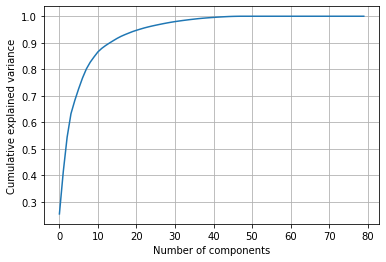

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()

In [74]:
pca = PCA(n_components = 20)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [75]:
mlp_pca = MLPClassifier(random_state=1, max_iter=100, hidden_layer_sizes=(100))

mlp_pca.fit(X_train_pca,y_train)
predict_train = mlp_pca.predict(X_train_pca)
predict_test = mlp_pca.predict(X_test_pca)

The PCA improves the model, only using the parameter n_components as 20. 

In [76]:
mlp_pca.score(X_test_pca, y_test)

0.95

### Conclusion

This dataset is very simple. All the changes made in the parameters of MLP don't change the score. Using GridSearchCV, the best parameters of activation and solver was logistic and lbfgs respectively. Applying PCA and selecting 20 components, it improves the model from 0.9 to 0.95.